# **Data Collection**

## Objectives

* Download data from Kaggle.com and perform an initial EDA.

## Inputs

* unclean_smartwatch_health_data.csv

## Outputs

* ydata-profiling EDA

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Predictive_Analytics_Project/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Predictive_Analytics_Project'

In [4]:
CleanedDataFolder = "inputs/cleaned_data/"
OutputFolder = "outputs/"
HypothesisOneFolder = CleanedDataFolder + "hypothesis_one_data/"

In [5]:
import pandas as pd

%matplotlib inline
# Hypothesis 1
data = pd.read_csv(HypothesisOneFolder + "cleaned_smartwatch_health_data.csv")
df1 = pd.DataFrame(data)

# Section 1 Assess Correlation and PPS score

First i tried a pearsons correlation test, I encoded the categoric variable for this task.

In [ ]:
import numpy as np
from feature_engine.encoding import OrdinalEncoder

encoder = OrdinalEncoder(encoding_method='arbitrary', variables=["Activity Level"])),
# I have chosen OrdinalEncoder as our categorical variables have an ordinal relationship
        

df_processed = encoder.fit_transform(df1)

df_processed = pd.DataFrame(df_processed, columns=df1.columns)
df_processed.head()

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,58.939776,98.809650,5450.390578,7.167236,0,1
1,75.220601,98.532195,727.601610,6.538239,0,5
2,113.995083,97.052954,2826.521994,6.503308,0,5
3,40.000000,96.894213,13797.338044,7.367790,1,3
4,61.950165,98.583797,15679.067648,6.503308,0,6


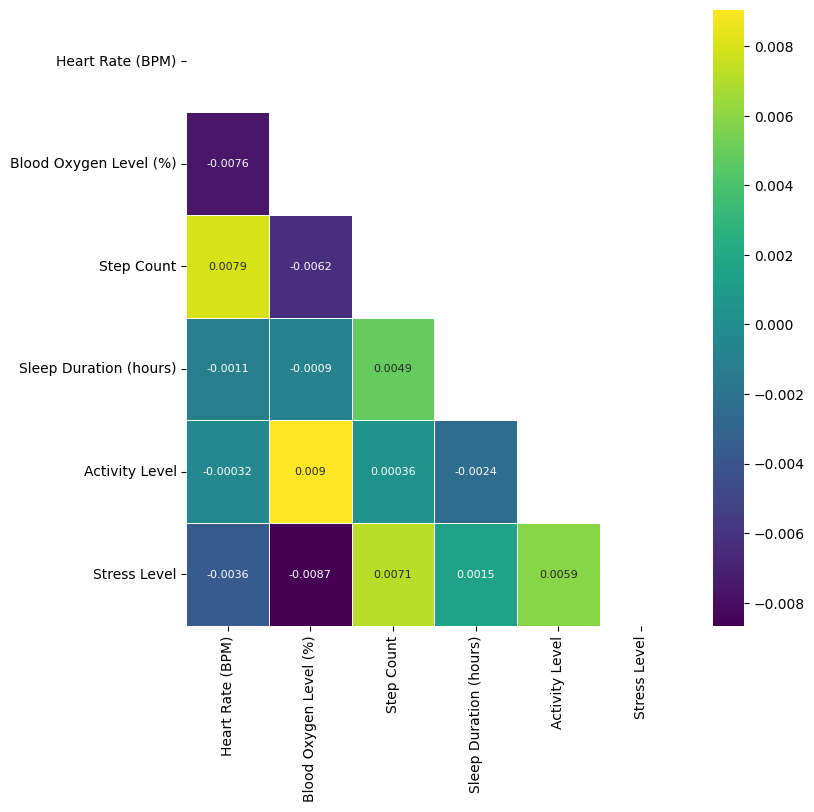

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
Heart Rate (BPM),1.000000,-0.007607,0.007950,-0.001052,-0.000319,-0.003634
Blood Oxygen Level (%),-0.007607,1.000000,-0.006242,-0.000899,0.009048,-0.008658
Step Count,0.007950,-0.006242,1.000000,0.004886,0.000357,0.007149
Sleep Duration (hours),-0.001052,-0.000899,0.004886,1.000000,-0.002424,0.001516
Activity Level,-0.000319,0.009048,0.000357,-0.002424,1.000000,0.005894


In [70]:
import ppscore as pps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_corr = df_processed.copy().corr(method="pearson")
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(data=df_corr, annot=True, mask=mask, cmap='viridis', annot_kws={"size": 8}, linewidths=0.5)
plt.ylim(df_corr.shape[1], 0) # it sets the y axis limits
plt.show()

df_corr.head()

Correlation exists where you expect to find it with the given variables, but the correlation is far too little to say for sure the columns have a direct downward or upward relationship with eachother.

The only way i was able to visualize this data clearly , was with density plots (kdeplots) as the different columns are very noisey. This may take two minutes to load this plot montage

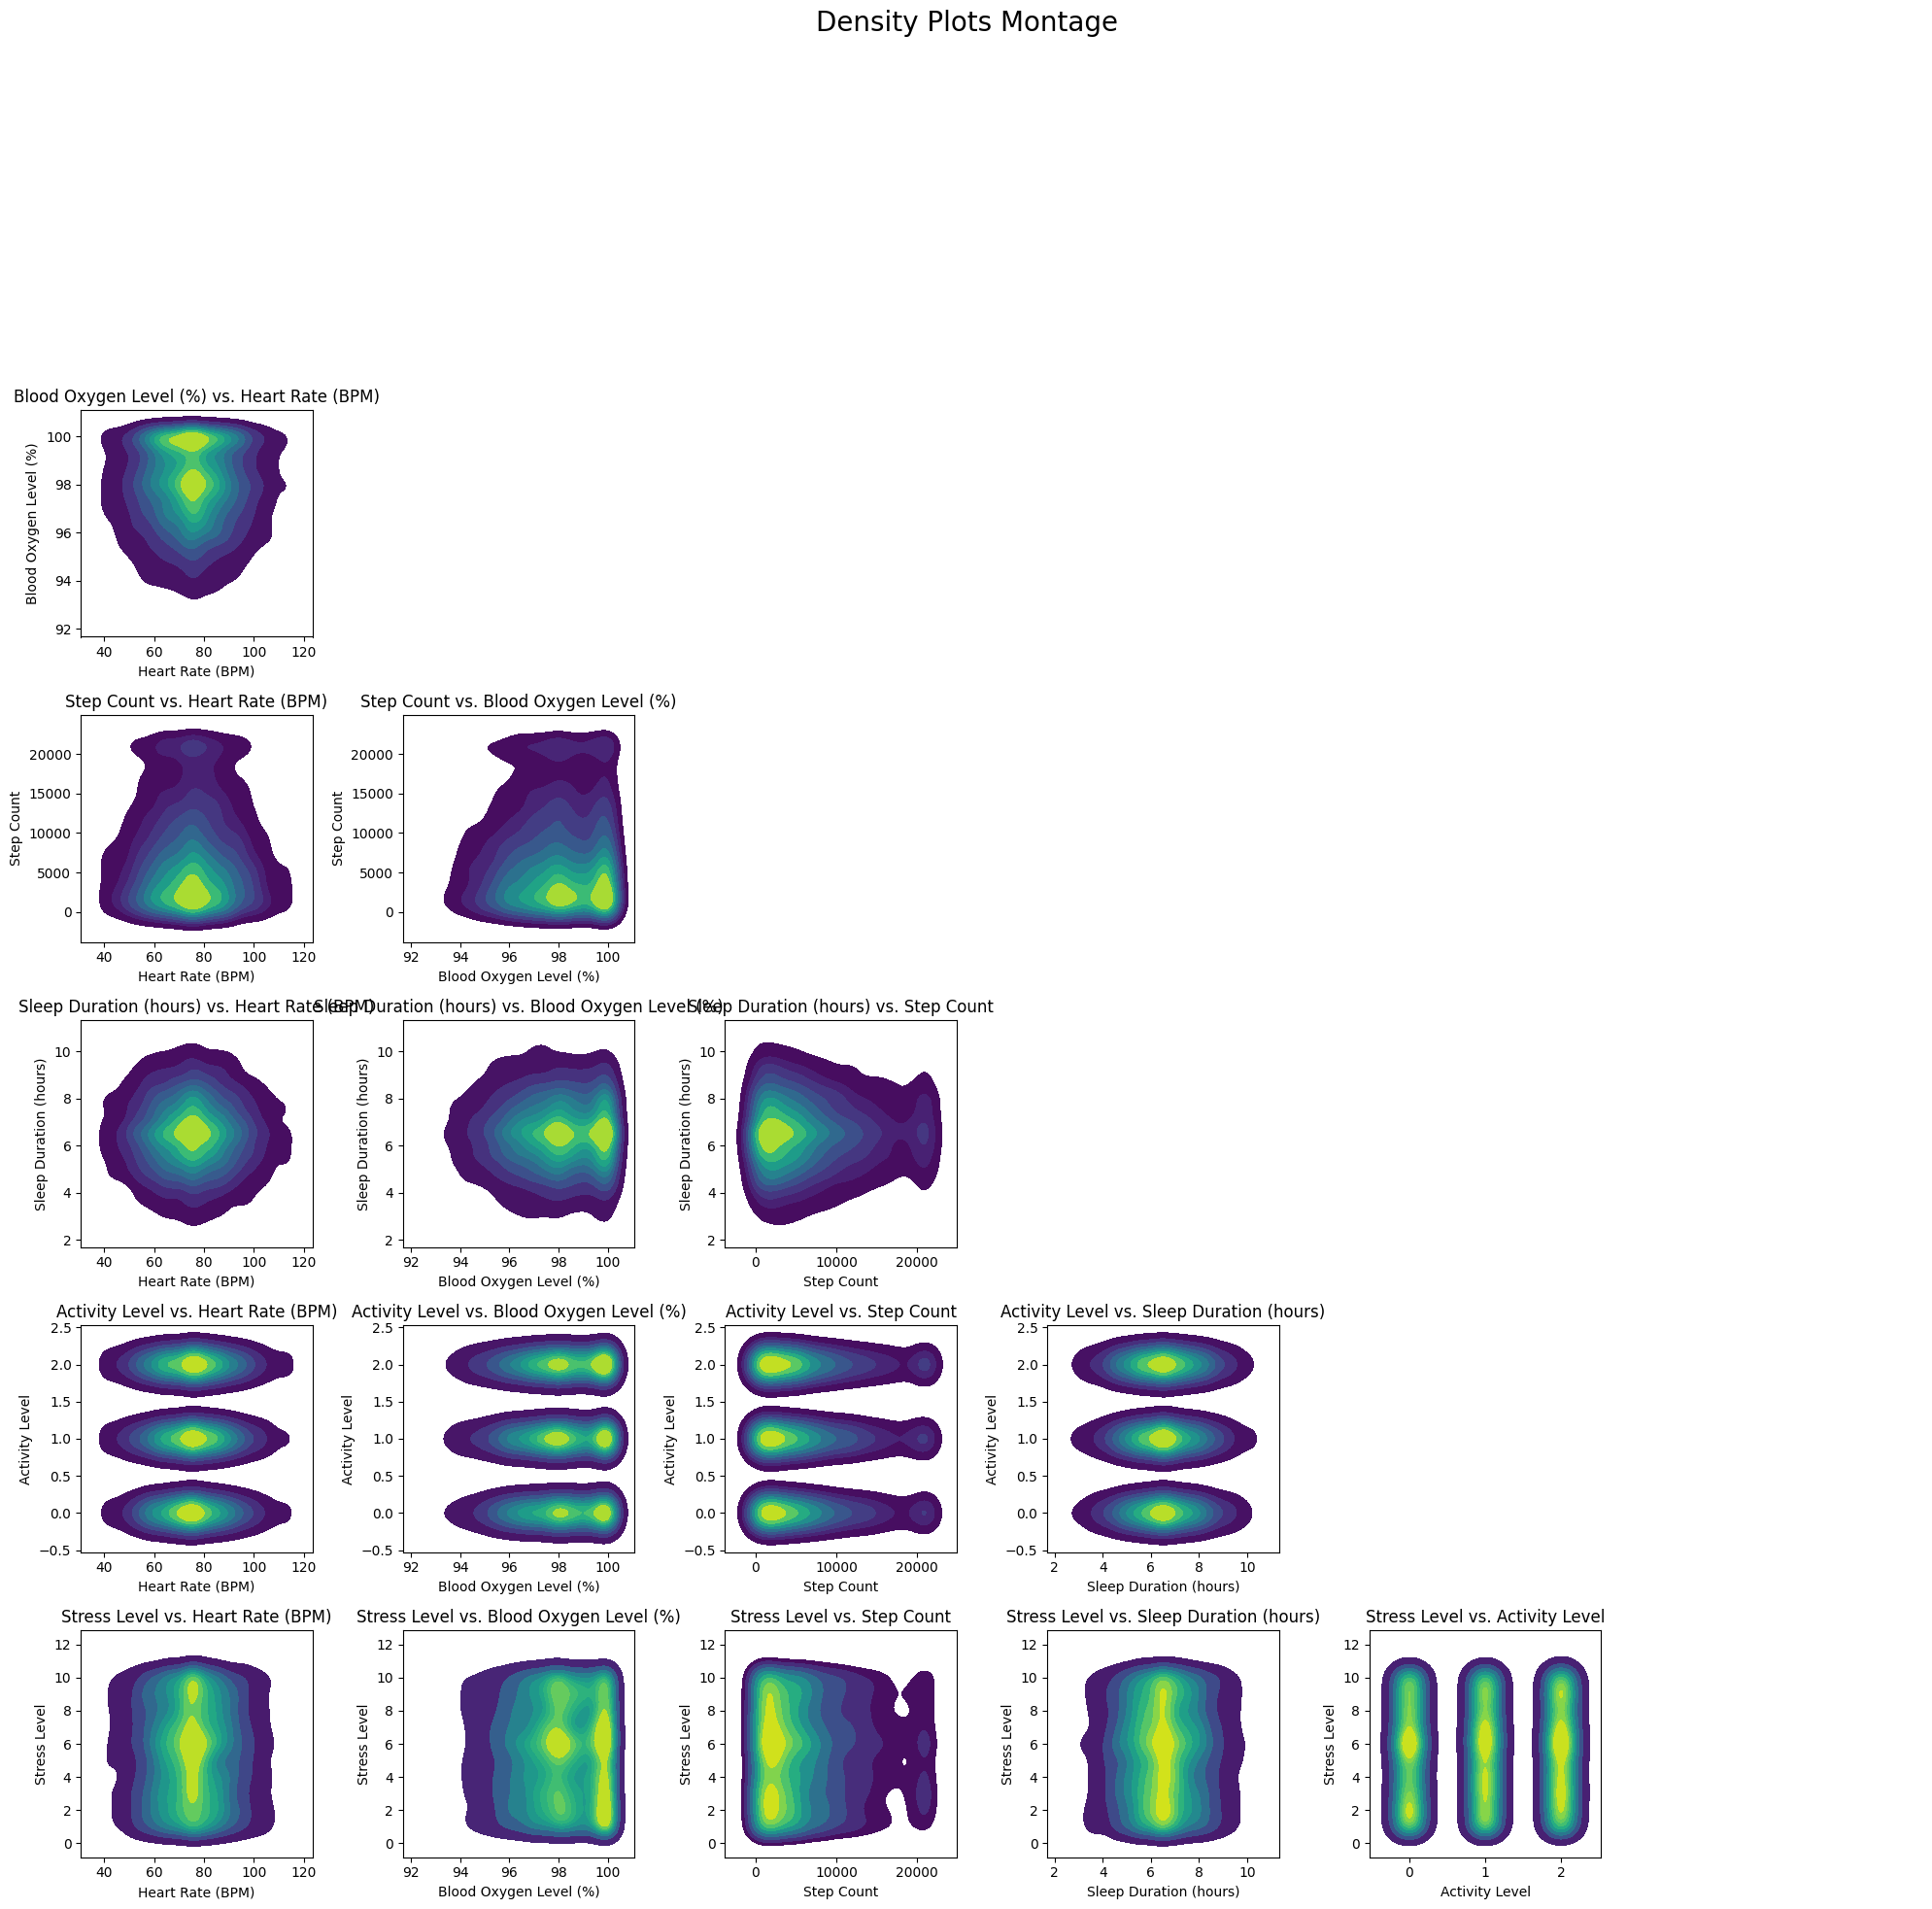

In [ ]:
df = df_processed.copy()
 
 # Create output directory if it doesn't exist
output_dir = OutputFolder + 'density_plots'
os.makedirs(output_dir, exist_ok=True)
 
# List of columns to compare
columns = ['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Activity Level', 'Stress Level']

# Create a figure with subplots for the lower triangle
fig, axes = plt.subplots(len(columns), len(columns), figsize=(20, 20))
fig.suptitle('Density Plots Montage', fontsize=20)

# Plot only the lower triangle of the matrix
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i > j:  # This condition ensures only the lower triangle is plotted
            sns.kdeplot(
                x=df[col2], y=df[col1], 
                cmap='viridis', fill=True, 
                ax=axes[i, j]
            )
            plot_title = f'{col1} vs. {col2}'
            axes[i, j].set_title(plot_title)
            axes[i, j].set_xlabel(col2)  # Set correct x-label
            axes[i, j].set_ylabel(col1)  # Set correct y-label
            
            # Save each individual plot
            individual_plot_path = os.path.join(
                output_dir, f"{plot_title.replace(' ', '_').lower()}.png"
            )
            single_plot_fig = plt.figure()
            sns.kdeplot(x=df[col2], y=df[col1], cmap='viridis', fill=True)
            plt.title(plot_title)
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.savefig(individual_plot_path)
            plt.close(single_plot_fig)
        else:
            axes[i, j].axis('off')  # Turn off plots in the upper triangle and diagonal

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the entire montage as a single image
montage_path = os.path.join(output_dir, 'density_plots_montage.png')

* Blood Oxygen Level (%) vs. Heart Rate (BPM):

  * There's a concentration of data points around a heart rate of 60-80 BPM and blood oxygen levels of 95-100%. This suggests that most individuals have a heart rate within this range when their blood oxygen levels are high.

* Step Count vs. Heart Rate (BPM):

  * Higher step counts are associated with a wider range of heart rates, with a concentration around 60-80 BPM. This suggests that individuals with higher step counts tend to have a moderate heart rate.

* Step Count vs. Blood Oxygen Level (%):

  * Higher step counts are associated with blood oxygen levels around 95-100%. This suggests that individuals with higher step counts tend to maintain high blood oxygen levels.

* Sleep Duration (hours) vs. Heart Rate (BPM):

  * There's a concentration of data points around 6-8 hours of sleep and a heart rate of 60-80 BPM. This suggests that individuals who sleep for 6-8 hours tend to have a moderate heart rate.

* Sleep Duration (hours) vs. Blood Oxygen Level (%):

  * Sleep duration is generally associated with blood oxygen levels around 95-100%. This suggests that individuals maintain high blood oxygen levels regardless of sleep duration.

* Sleep Duration (hours) vs. Step Count:

  * There's a concentration of data points around 6-8 hours of sleep and a wide range of step counts. This suggests that sleep duration is not strongly correlated with step count.

* Activity Level vs. Heart Rate (BPM):

  * Higher activity levels are associated with a wider range of heart rates, with a concentration around 60-80 BPM. This suggests that individuals with higher activity levels tend to have a moderate heart rate.

* Activity Level vs. Blood Oxygen Level (%):

  * Higher activity levels are associated with blood oxygen levels around 95-100%. This suggests that individuals with higher activity levels tend to maintain high blood oxygen levels.

* Activity Level vs. Step Count:

  * Higher activity levels are associated with higher step counts. This suggests a positive correlation between activity level and step count.

* Activity Level vs. Sleep Duration (hours):

  * There's a concentration of data points around 6-8 hours of sleep and a wide range of activity levels. This suggests that sleep duration is not strongly correlated with activity level.

* Stress Level vs. Heart Rate (BPM):

  * There's a concentration of data points around a heart rate of 60-80 BPM and varying stress levels. This suggests that stress level is not strongly correlated with heart rate.

* Stress Level vs. Blood Oxygen Level (%):

  * Stress levels are associated with blood oxygen levels around 95-100%. This suggests that individuals maintain high blood oxygen levels regardless of stress level.

* Stress Level vs. Step Count:

  * There's a concentration of data points around varying stress levels and higher step counts. This suggests that stress level is not strongly correlated with step count.

* Stress Level vs. Sleep Duration (hours):

  * There's a concentration of data points around 6-8 hours of sleep and varying stress levels. This suggests that stress level is not strongly correlated with sleep duration.

* Stress Level vs. Activity Level:

  * There's a concentration of data points around varying stress levels and higher activity levels. This suggests that stress level is not strongly correlated with activity level.

Overall, the density plots provide insights into the relationships between the health and activity metrics, showing that some variables, such as step count and activity level, have positive correlations, while others, stress level do not show strong cdorrelations.

Calculate PPS

PPS showed no insightfull information I could use.

In [67]:
pps_matrix_raw = pps.matrix(df_processed)
pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

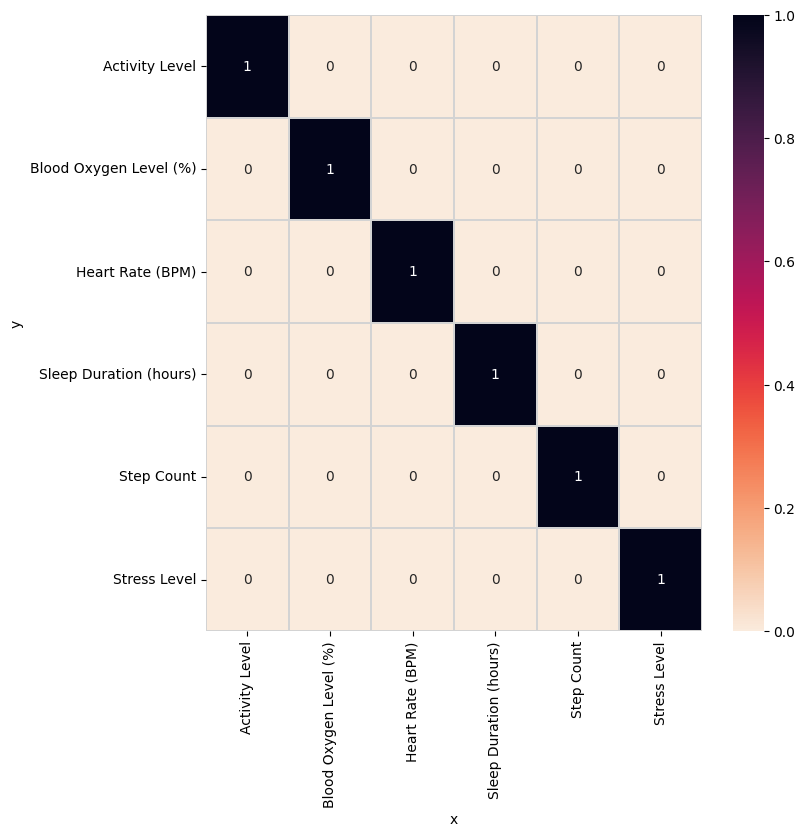

In [68]:
# We use a modified version of our custom heatmap function to plot the PPS matrix.
def heatmap_pps(df,threshold, figsize=(8,8), font_annot = 10):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, annot_kws={"size": font_annot},
                       mask=mask,cmap='rocket_r', linewidth=0.05,
                       linecolor='lightgrey')
      
      plt.ylim(len(df.columns),0)
      plt.show()

heatmap_pps(df=pps_matrix, threshold=0)


Section 1 content

---

# Section 2 EDA

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
